<a href="https://colab.research.google.com/github/linghduoduo/numpy-ml/blob/master/Click_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_parquet("~/Downloads/0000_part_00.parquet")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299643 entries, 0 to 5299642
Data columns (total 28 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   referralcreativeid      int64 
 1   targetgroupid           int64 
 2   campaignid              int64 
 3   accountid               int64 
 4   publisherid             int64 
 5   gender                  int32 
 6   agegroup                int32 
 7   deviceplatform          int32 
 8   repeatvisitor           int32 
 9   positiveresponse        int32 
 10  negativeresponse        int32 
 11  age                     int64 
 12  secondssincelastseen    int64 
 13  secondssincelastposres  int64 
 14  secondssincelastnegres  int64 
 15  rank                    int64 
 16  placementid             int64 
 17  cardtype                object
 18  cardsubtype             object
 19  topcardtype             object
 20  operatingsystem         object
 21  devicebrand             object
 22  browser           

In [ ]:
creatives = pd.read_csv("~/Downloads/creatives_with_tags.csv")

In [ ]:
creatives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   creativeid           3880 non-null   int64 
 1   text                 3880 non-null   object
 2   free_delivery        3880 non-null   bool  
 3   free_trail           3880 non-null   bool  
 4   lucky_draw           3880 non-null   bool  
 5   click                3880 non-null   bool  
 6   dollar_sign          3880 non-null   bool  
 7   exclamation          3880 non-null   bool  
 8   question_sign        3880 non-null   bool  
 9   discount             3880 non-null   bool  
 10  offer                3880 non-null   bool  
 11  unlock               3880 non-null   bool  
 12  bonus                3880 non-null   bool  
 13  cash_back            3880 non-null   bool  
 14  sign_up              3880 non-null   bool  
 15  now                  3880 non-null   bool  
 16  first_

In [ ]:
copytext = creatives['text']

In [ ]:
import nltk
import re
import numpy as np
from langdetect import detect

ModuleNotFoundError: ignored

In [ ]:
def cleaning_text(s_text):
    #try remove all tags
    document = re.sub(r'\<[^>]*>','',str(s_text)) #tick
    
#     #replace coded apostrophies
#     document = document.replace('&rsquo;','') #tick
    document = document.replace('&amp;','and') #tick
#     document = document.replace('%',' percent') #tick
#     document = document.replace('*','') #tick
#     document = document.replace('$','dollars ') #tick
    document = document.replace('&nbsp','') #tick

#     #remove prefixed Test
#     document = re.sub(r'^Test\s+', '', document)

#     # Remove all the special characters
# #     document = re.sub(r'[,@\'?\.$%_]', '', document)

#     # remove all single characters
#     document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
#      # Remove single characters from the start
#     document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
#     # Substituting multiple spaces with single space
#     document = re.sub(r'\s+', ' ', document, flags=re.I)
    
#     # Removing prefixed 'b'
#     document = re.sub(r'^b\s+', '', document)
#     document = re.sub(r'\W', ' ',document)   
    
    # Converting to Lowercase
    document = document.lower()
    return document

In [ ]:
creatives['clean_text']=copytext.apply(lambda x: cleaning_text(x))

## Join Tables

In [ ]:
all = pd.merge(data, creatives, left_on=["referralcreativeid"], right_on=["creativeid"], how="left")

In [ ]:
all.head()

,referralcreativeid,targetgroupid,campaignid,accountid,publisherid,gender,agegroup,deviceplatform,repeatvisitor,positiveresponse,...,save,apr,loan,discount.1,discount_value,discount_num,discount_perc,discount_perc_num,no_number,clean_text
0,2646117866475294712,2692224928836550658,2536115181270101577,101767,64,1,2,2,2,0,...,False,False,False,False,False,False,False,False,True,your purchase gives you access to amazing deal...
1,2876960757946056733,2876932591550332946,2855789494061301904,2853527618225229629,2045379072644613984,2,5,1,5,0,...,False,False,False,False,False,False,False,False,True,you've earned a free trial to discovery+! the ...
2,2886698170375209078,2859533790709940435,2820179516474261505,2791520355034103636,2045379072644613984,2,5,1,5,8,...,False,False,False,True,True,200,False,False,False,unlock up to $200 to spend online when you joi...
3,2873745257665069106,2886801434273644881,2837686477485113390,2791726255766259938,64,2,2,2,7,0,...,False,False,False,False,False,False,False,False,True,our koalas are very quickly heading towards ex...
4,2879161314514436348,2692884309398716623,2692879945712140371,2633455211965079646,64,2,2,2,0,0,...,False,False,False,True,True,150,False,False,False,you've earned $150 off smiledirectclub aligner...


In [ ]:
all = all.dropna()

In [ ]:
all.head()

,referralcreativeid,targetgroupid,campaignid,accountid,publisherid,gender,agegroup,deviceplatform,repeatvisitor,positiveresponse,...,save,apr,loan,discount.1,discount_value,discount_num,discount_perc,discount_perc_num,no_number,clean_text
25,2877094116681646110,2886801434273644881,2837686477485113390,2791726255766259938,100,1,3,2,8,0,...,False,False,False,False,False,False,False,False,True,our koalas are losing their homes and their li...
65,2864738144312164568,2864737723405631502,2812042340155326467,2443482344537199973,2601936972420513252,2,6,1,7,0,...,False,False,False,False,False,False,False,False,True,get available coupon codes automatically appli...
97,2887882859786469391,2881856153088819253,2871881563989147782,2809479086472472188,100,2,2,2,0,0,...,False,False,False,True,True,500,False,False,False,download and sign in to the bws app to go into...
117,2770807802255704283,2770807334104072306,2770806943262048353,2755560006908929678,404,2,0,2,0,0,...,False,False,False,False,False,False,False,False,False,click below to claim your €16.87 cash back on ...
156,2798422745457885189,2804369278003183635,2133407807667190781,102564,131,2,6,1,8,0,...,True,False,False,True,True,"4,000",False,False,False,maximise your kiwisaver savings by receiving a...


In [ ]:
sample = all[:100]

In [ ]:
sample[:1]['clean_text']

25    our koalas are losing their homes and their li...
Name: clean_text, dtype: object

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
s = str(sample[:1]['clean_text'])
print(' '.join(tokenizer.tokenize(s.lower())))

25 our koalas are losing their homes and their li ... name : clean_text , dtype : object


## Transformers

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline('sentiment-analysis')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
classifier("You've earned 50% off 6 bottles of wine from Firstleaf! Personalized wines matched to your taste buds. Take the wine quiz & get $40 worth of free wine.")

[{'label': 'NEGATIVE', 'score': 0.9808275699615479}]

In [ ]:
classifier("You've earned 5% off 6 bottles of wine from Firstleaf! Personalized wines matched to your taste buds. Take the wine quiz & get $40 worth of free wine.")

[{'label': 'NEGATIVE', 'score': 0.9812963008880615}]

In [ ]:
classifier(s)

[{'label': 'NEGATIVE', 'score': 0.9998084902763367}]

In [ ]:
all.to_csv("all.csv")

## Readin clean data directly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
workspace_dir = './drive/My Drive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    raw_train_dataset_csv="./drive/My Drive/Colab Notebooks/data/yelp/all.csv",
    proportion_subset_of_train=0.1,
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="./drive/My Drive/Colab Notebooks/data/yelp/all_split.csv",
    seed=1337
)

In [ ]:
import collections
import numpy as np
import pandas as pd
import re

In [ ]:
# Read raw data
train_reviews = pd.read_csv(args.raw_train_dataset_csv, header=None, names=['referrals', 'clean_text'])
train_reviews = train_reviews[~pd.isnull(train_reviews.referrals)]

test_reviews = pd.read_csv(args.raw_train_dataset_csv, header=None, names=['referrals', 'clean_text'])
test_reviews = test_reviews[~pd.isnull(test_reviews.referrals)]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train_reviews['referrals'].value_counts()

False        216485
True          58961
False         12508
True           3875
no_number         1
Name: referrals, dtype: int64

In [ ]:
train_reviews['referrals'] = train_reviews['referrals'].apply(lambda x: x == True or x == 'True')


In [ ]:
test_reviews['referrals'] = test_reviews['referrals'].apply(lambda x: x==True or x=='True')

In [ ]:
train_reviews.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,referrals,clean_text
NaN,referralcreativeid,targetgroupid,campaignid,accountid,publisherid,gender,agegroup,deviceplatform,repeatvisitor,positiveresponse,negativeresponse,age,secondssincelastseen,secondssincelastposres,secondssincelastnegres,rank,placementid,cardtype,cardsubtype,topcardtype,operatingsystem,devicebrand,browser,pagetype,placementlayout,offerlayout,emaildomain,referrals,creativeid,text,free_delivery,free_trail,lucky_draw,click,dollar_sign,exclamation,question_sign,discount,offer,unlock,bonus,cash_back,sign_up,now,first_name_replaced,claim,enjoy,help,congrats,save,apr,loan,discount.1,discount_value,discount_num,discount_perc,discount_perc_num,False,clean_text
25.0,2877094116681646110,2886801434273644881,2837686477485113390,2791726255766259938,100,1,3,2,8,0,8,38,3753003,0,3753002,2,2705182136470994945,DEBIT,GOLD,debit,iOS,Apple,Mobile Safari,Confirmation,LightboxLayout,OfferLayout2,hotmail.com,0,2.877094116681646e+18,<p>our koalas are losing their homes &amp; their lives. adopt one today with wwf-australia to help return more koalas to the wild. sign up to help.</p>,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,our koalas are losing their homes and their li...
65.0,2864738144312164568,2864737723405631502,2812042340155326467,2443482344537199973,2601936972420513252,2,6,1,7,0,7,77,1247158,13516433,1247148,1,2705608300305973249,CREDIT,CLASSIC,classiccredit,Mac OS X,Apple,Safari,Confirmation,LightboxLayout,OfferLayout2,comcast.net,0,2.8647381443121644e+18,"<p>get available coupon codes automatically applied to your orders. simply add capital one shopping to your browser, and shop like normal. this free tool does the work for you.</p>",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,get available coupon codes automatically appli...
97.0,2887882859786469391,2881856153088819253,2871881563989147782,2809479086472472188,100,2,2,2,0,0,0,34,0,0,0,1,2705182136470994945,DEBIT,CLASSIC,debit,Android,Samsung,Instagram,Confirmation,LightboxLayout,OfferLayout2,hotmail.com,0,2.8878828597864694e+18,<p>download and sign in to the bws app to go into the draw to win 1 of 5 $500 wish vouchers!</p>,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,500,False,False,False,download and sign in to the bws app to go into...
117.0,2770807802255704283,2770807334104072306,2770806943262048353,2755560006908929678,404,2,0,2,0,0,0,0,0,0,0,1,2760885714816466946,DEBIT,CLASSIC,debit,iOS,Apple,Mobile Safari,Confirmation,LightboxLayout,OfferLayout2,gmail.com,0,2.770807802255704e+18,click below to claim your €16.87 cash back on your next online order with the complete savings paid programme.,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,click below to claim your €16.87 cash back on ...


In [ ]:
test_reviews.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,referrals,clean_text
NaN,referralcreativeid,targetgroupid,campaignid,accountid,publisherid,gender,agegroup,deviceplatform,repeatvisitor,positiveresponse,negativeresponse,age,secondssincelastseen,secondssincelastposres,secondssincelastnegres,rank,placementid,cardtype,cardsubtype,topcardtype,operatingsystem,devicebrand,browser,pagetype,placementlayout,offerlayout,emaildomain,referrals,creativeid,text,free_delivery,free_trail,lucky_draw,click,dollar_sign,exclamation,question_sign,discount,offer,unlock,bonus,cash_back,sign_up,now,first_name_replaced,claim,enjoy,help,congrats,save,apr,loan,discount.1,discount_value,discount_num,discount_perc,discount_perc_num,False,clean_text
25.0,2877094116681646110,2886801434273644881,2837686477485113390,2791726255766259938,100,1,3,2,8,0,8,38,3753003,0,3753002,2,2705182136470994945,DEBIT,GOLD,debit,iOS,Apple,Mobile Safari,Confirmation,LightboxLayout,OfferLayout2,hotmail.com,0,2.877094116681646e+18,<p>our koalas are losing their homes &amp; their lives. adopt one today with wwf-australia to help return more koalas to the wild. sign up to help.</p>,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,our koalas are losing their homes and their li...
65.0,2864738144312164568,2864737723405631502,2812042340155326467,2443482344537199973,2601936972420513252,2,6,1,7,0,7,77,1247158,13516433,1247148,1,2705608300305973249,CREDIT,CLASSIC,classiccredit,Mac OS X,Apple,Safari,Confirmation,LightboxLayout,OfferLayout2,comcast.net,0,2.8647381443121644e+18,"<p>get available coupon codes automatically applied to your orders. simply add capital one shopping to your browser, and shop like normal. this free tool does the work for you.</p>",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,get available coupon codes automatically appli...
97.0,2887882859786469391,2881856153088819253,2871881563989147782,2809479086472472188,100,2,2,2,0,0,0,34,0,0,0,1,2705182136470994945,DEBIT,CLASSIC,debit,Android,Samsung,Instagram,Confirmation,LightboxLayout,OfferLayout2,hotmail.com,0,2.8878828597864694e+18,<p>download and sign in to the bws app to go into the draw to win 1 of 5 $500 wish vouchers!</p>,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,500,False,False,False,download and sign in to the bws app to go into...
117.0,2770807802255704283,2770807334104072306,2770806943262048353,2755560006908929678,404,2,0,2,0,0,0,0,0,0,0,1,2760885714816466946,DEBIT,CLASSIC,debit,iOS,Apple,Mobile Safari,Confirmation,LightboxLayout,OfferLayout2,gmail.com,0,2.770807802255704e+18,click below to claim your €16.87 cash back on your next online order with the complete savings paid programme.,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,click below to claim your €16.87 cash back on ...


In [ ]:
set(train_reviews.referrals)

{False, True}

In [ ]:
# making the subset equal across the review classes
by_rating = collections.defaultdict(list)
for _, row in train_reviews.iterrows():
    by_rating[row.referrals].append(row.to_dict())

In [ ]:
# Example 3-12. Creating training, validation, and testing splits
final_list = []
np.random.seed(args.seed)

for _, item_list in by_rating.items():

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'

    # Add to final list
    final_list.extend(item_list)

In [ ]:
for _, row in test_reviews.iterrows():
  row_dict = row.to_dict()
  row_dict['split'] = 'test'
  final_list.append(row_dict)

In [ ]:
final_reviews = pd.DataFrame(final_list)

In [ ]:
final_reviews.split.value_counts()

test     291830
train    204280
val       43774
Name: split, dtype: int64

In [ ]:
final_reviews['referrals'] = final_reviews.referrals.apply({False: 'negative', True: 'positive'}.get)

In [ ]:
final_reviews['referrals'].value_counts()

negative    457988
positive    125672
Name: referrals, dtype: int64

In [ ]:
final_reviews.to_csv(args.output_munged_csv, index=False)

In [ ]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
#The Vocabulary class maintains token to integer mapping needed for the rest of the machine learning pipeline
class Vocabulary(object):
    """Class to process text and extract Vocabulary for mapping"""

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
            add_unk (bool): a flag that indicates whether to add the UNK(unknow) token
            unk_token (str): the UNK token to add into the Vocabulary
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}

        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self._add_unk:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
##  The Vectorizer class converts text to numeric vectors
class ReviewVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """Create a collapsed one-hit vector for the review
        
        Args:
            review (str): the review
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        # Add ratings
        for rating in sorted(set(review_df.referrals)):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count
        word_counts = Counter()
        for review in review_df.clean_text:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """Intantiate a ReviewVectorizer from a serializable dictionary
        
        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """Create the serializable dictionary for caching
        
        Returns:
            contents (dict): the serializable dictionary
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}        

In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
            review_df (pandas.DataFrame): the dataset
            vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            review_csv (str): location of the dataset
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train']
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            review_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(review_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of ReviewVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe 
        
        Args:
            split (str): one of "train", "val", or "test"
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]
        
        review_vector = \
            self._vectorizer.vectorize(row.clean_text)

        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.referrals)

        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size    

In [ ]:
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will 
      ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

In [ ]:
## The Model: ReviewClassifier
class ReviewClassifier(nn.Module):
    """ a simple perceptron based classifier """
    def __init__(self, num_features):
        """
        Args:
            num_features (int): the size of the input feature vector
        """
        super(ReviewClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features=num_features, 
                             out_features=1)

    def forward(self, x_in, apply_sigmoid=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, num_features)
            apply_sigmoid (bool): a flag for the sigmoid activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch,)
        """
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
        return y_out

In [ ]:
import torch.optim as optim

In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

In [ ]:
def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

In [ ]:
def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
## General utilities
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [ ]:

## Settings and some prep work
args = Namespace(
    # Data and Path information
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv="./drive/My Drive/Colab Notebooks/data/yelp/all_split.csv",
    save_dir='./drive/My Drive/Colab Notebooks/data/yelp/',
    vectorizer_file='vectorizer.json',
    # No Model hyper parameters
    # Training hyper parameters
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)


if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

print("Using CUDA: {}".format(args.cuda))

args.device = torch.device("cuda" if args.cuda else "cpu")

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)


Expanded filepaths: 
	./drive/My Drive/Colab Notebooks/data/yelp/vectorizer.json
	./drive/My Drive/Colab Notebooks/data/yelp/model.pth
Using CUDA: True


In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    print("Loading dataset and vectorizer")
    dataset = ReviewDataset.load_dataset_and_load_vectorizer(args.review_csv,
                                                            args.vectorizer_file)
else:
    print("Loading dataset and creating vectorizer")
    # create dataset and vectorizer
    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
    dataset.save_vectorizer(args.vectorizer_file)    
vectorizer = dataset.get_vectorizer()

classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))

Loading dataset and creating vectorizer


In [ ]:

## Example 3-21. A bare-bones training loop

In [ ]:
classifier = classifier.to(args.device)

loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                 mode='min', factor=0.5,
                                                 patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on
        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, 
                                  acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            
            val_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
            val_bar.update()

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)

        train_state = update_train_state(args=args, model=classifier, 
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [39]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))
classifier = classifier.to(args.device)

dataset.set_split('test')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred = classifier(x_in=batch_dict['x_data'].float())

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'].float())
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

print("Test loss: {:.3f}".format(train_state['test_loss']))
print("Test Accuracy: {:.2f}".format(train_state['test_acc']))

Test loss: 0.000
Test Accuracy: 100.00


In [40]:
def predict_rating(review, classifier, vectorizer, decision_threshold=0.5):
    """Predict the rating of a review
    
    Args:
        review (str): the text of the review
        classifier (ReviewClassifier): the trained model
        vectorizer (ReviewVectorizer): the corresponding vectorizer
        decision_threshold (float): The numerical boundary which separates the rating classes
    """
    # review = preprocess_text(review)
    
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    result = classifier(vectorized_review.view(1, -1))
    
    probability_value = F.sigmoid(result).item()
    index = 1
    if probability_value < decision_threshold:
        index = 0

    return vectorizer.rating_vocab.lookup_index(index)


In [41]:
test_review = "get started to reach more of the right audience. this is a limited time offer $30"

classifier = classifier.cpu()
prediction = predict_rating(test_review, classifier, vectorizer, decision_threshold=0.5)
print("{} -> {}".format(test_review, prediction))

get started to reach more of the right audience. this is a limited time offer $30 -> positive


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [51]:
# Sort weights
fc1_weights = classifier.fc1.weight.detach()[0]
_, indices = torch.sort(fc1_weights, dim=0, descending=True)
indices = indices.numpy().tolist()

# Top 20 words
print("Influential top 20 words in Positive Click Creatives:")
print("--------------------------------------")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
print("====\n\n\n")

# # Top 20 negative words
# print("Influential words in Negative Click Creatives:")
# print("--------------------------------------")
# indices.reverse()
# for i in range(20):
#     print(vectorizer.review_vocab.lookup_index(indices[i]))

Influential top 20 words in Positive Click Creatives:
--------------------------------------
entered
cart!
impacting
score.
events
around
donate
discovery+!
coverings
us?
distributing
shipping?
children
kogan.com.
gives
without
mother’s
entertainment
group
property
====





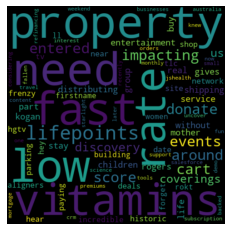

In [52]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=[vectorizer.review_vocab.lookup_index(indices[i]) for i in range(100)]
text=" ".join(text)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()